In [5]:
FILE_PATH = r"..\dataset\survey_results.csv"

In [86]:
import pandas as pd
import seaborn as sns
import scipy

import matplotlib.pyplot as plt

In [6]:
df_results = pd.read_csv(FILE_PATH)
df_results.head()

,Timestamp,Are you a NUS / Yale-NUS student that is 18 years old and above?,"I have read about the purpose of this research study, agree to participate, and understand that I can withdraw at any time.",What is your major / prospective major?,Do you have any experience with AI / data science / programming?,Do you have any experience with regarding data privacy / law?,Are you concerned about your data privacy?,How would you rate your capability in protecting your online data?,Do you think decisions that are made by AI can be useful to society?,Do you think decisions made by AI are fair?,...,Think that using the model is a method that could be a risk to society?.3,Trust the prediction made by the model?.3,Think that using the model is an effective method of identifying violations of the PDPA?.4,Think that using the model is a fair method of identifying violations of the PDPA?.4,Think that using the model is a method that could be a risk to society?.4,Trust the prediction made by the model?.4,Think that using the model is an effective method of identifying violations of the PDPA?.5,Think that using the model is a fair method of identifying violations of the PDPA?.5,Think that using the model is a method that could be a risk to society?.5,Trust the prediction made by the model?.5
0,2023/01/30 4:34:41 PM GMT+8,Yes,Yes,Environmental Studies,3,1,2,2,4,3,...,2,2,2,2,2,2,2,2,3,2
1,2023/01/30 5:02:57 PM GMT+8,Yes,Yes,Global Affairs / Political Science,2,3,2,1,5,4,...,2,1,2,2,2,1,4,3,2,4
2,2023/01/30 5:14:27 PM GMT+8,Yes,Yes,Economics,3,3,4,2,5,3,...,2,3,1,1,1,1,1,1,1,1
3,2023/01/30 6:05:25 PM GMT+8,Yes,Yes,Law,1,4,4,4,3,2,...,2,3,2,2,1,2,3,2,2,4
4,2023/01/30 6:06:22 PM GMT+8,Yes,Yes,Law,1,1,3,3,5,3,...,3,3,1,1,2,3,2,2,3,3


In [39]:
# Create unique IDs for each respondent
df_results["id"] = [n for n in range(len(df_results))]

#### Segment the columns according to the parts in the survey

In [18]:
# Demographic data
print(df_results.columns[3:11])

Index(['What is your major / prospective major?',
       'Do you have any experience with AI / data science / programming?',
       'Do you have any experience with regarding data privacy / law?',
       'Are you concerned about your data privacy?',
       'How would you rate your capability in protecting your online data?',
       'Do you think decisions that are made by AI can be useful to society?',
       'Do you think decisions made by AI are fair?',
       'Do you think decisions made by AI can be a risk to society?'],
      dtype='object')


In [30]:
# Part 2: three Contexts initial survey
print(df_results.columns[12:24])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?',
       'Think that using the model is a fair method of identifying violations of the PDPA?',
       'Think that using the model is a method that could be a risk to society?',
       'Trust the prediction made by the model?',
       'Think that using the model is an effective method of identifying violations of the PDPA?.1',
       'Think that using the model is a fair method of identifying violations of the PDPA?.1',
       'Think that using the model is a method that could be a risk to society?.1',
       'Trust the prediction made by the model?.1',
       'Think that using the model is an effective method of identifying violations of the PDPA?.2',
       'Think that using the model is a fair method of identifying violations of the PDPA?.2',
       'Think that using the model is a method that could be a risk to society?.2',
       'Trust the prediction made by the model?.2'],
      dtype

In [33]:
# Part 3: Assessing understandability of log + tfidf
print(df_results.columns[24:39])

Index(['Do you understand why the model made the prediction?',
       'Why do you think the model made this prediction? ',
       'Did you find the visualisation easy to interpret?',
       'Do you understand why the model made the prediction?.1',
       'Why do you think the model made this prediction? .1',
       'Did you find the visualisation easy to interpret?.1',
       'Based on your current understanding, do you think that the sentence below would be predicted to be "Identifier_Cookie_or_Similar_Tech_1stParty"?\n\n"We also use tracking technologies to keep records, store your preferences, improve our advertising, and collect Non-Identifying Information, including Device Data and information about your interaction with the Site and our Business Partners' web sites."',
       'Do you understand why the model made the prediction?.2',
       'Why do you think the model made this prediction?',
       'Did you find the visualisation easy to interpret?.2',
       'Based on your curren

In [34]:
# Part 4: Comparing between log + glove vs svc + glove
print(df_results.columns[39:42])

Index(['Which explanation did you find easier to interpret?',
       'Which explanation did you find easier to interpret?.1',
       'Which explanation did you find easier to interpret?.2'],
      dtype='object')


In [37]:
# Part 4: Comparing between svc + tfidf vs svc + glove
print(df_results.columns[42:45])

Index(['Which explanation did you find easier to interpret?.3',
       'Which explanation did you find easier to interpret?.4',
       'Which explanation did you find easier to interpret?.5',
       'Think that using the model is an effective method of identifying violations of the PDPA?.3'],
      dtype='object')


In [41]:
# Part 5: Re assessing the same 3 contexts
print(df_results.columns[45: -1])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?.3',
       'Think that using the model is a fair method of identifying violations of the PDPA?.3',
       'Think that using the model is a method that could be a risk to society?.3',
       'Trust the prediction made by the model?.3',
       'Think that using the model is an effective method of identifying violations of the PDPA?.4',
       'Think that using the model is a fair method of identifying violations of the PDPA?.4',
       'Think that using the model is a method that could be a risk to society?.4',
       'Trust the prediction made by the model?.4',
       'Think that using the model is an effective method of identifying violations of the PDPA?.5',
       'Think that using the model is a fair method of identifying violations of the PDPA?.5',
       'Think that using the model is a method that could be a risk to society?.5',
       'Trust the prediction made by the model?.5'],
   

#### Visualisation of demographics

In [51]:
sns.set_theme(style = "whitegrid")

<AxesSubplot:xlabel='count', ylabel='What is your major / prospective major?'>

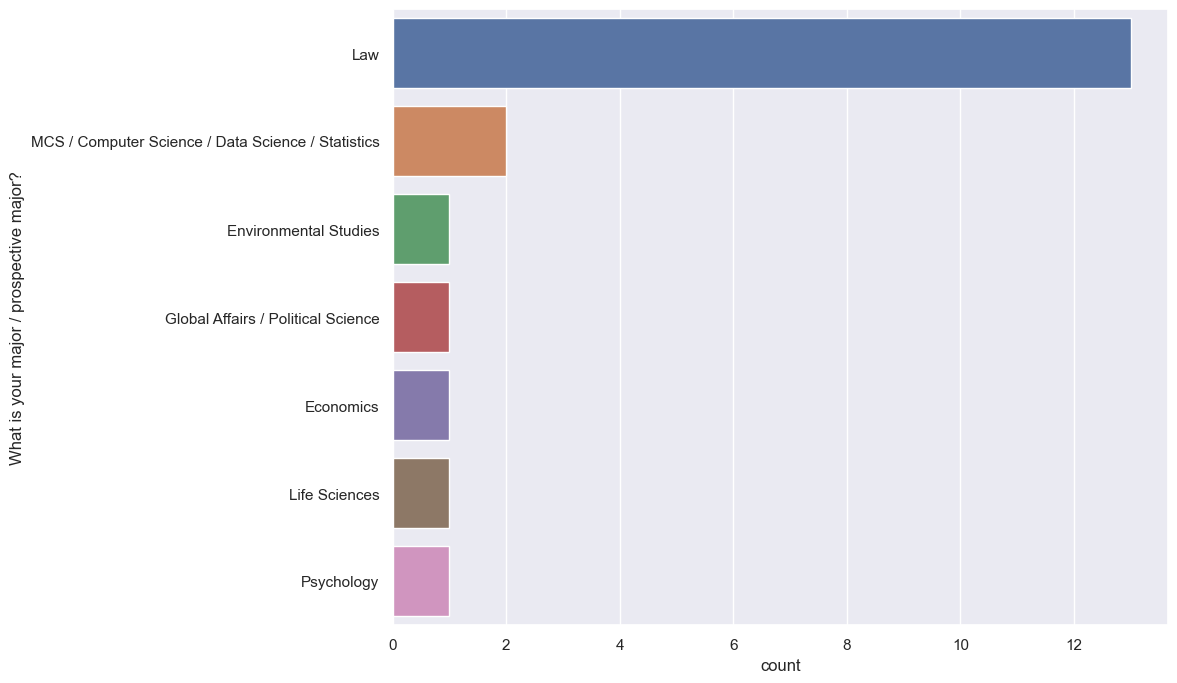

In [54]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(y = "What is your major / prospective major?", data = df_results, orient = "h", order = df_results["What is your major / prospective major?"].value_counts().index)

<AxesSubplot:xlabel='Do you have any experience with AI / data science / programming?', ylabel='count'>

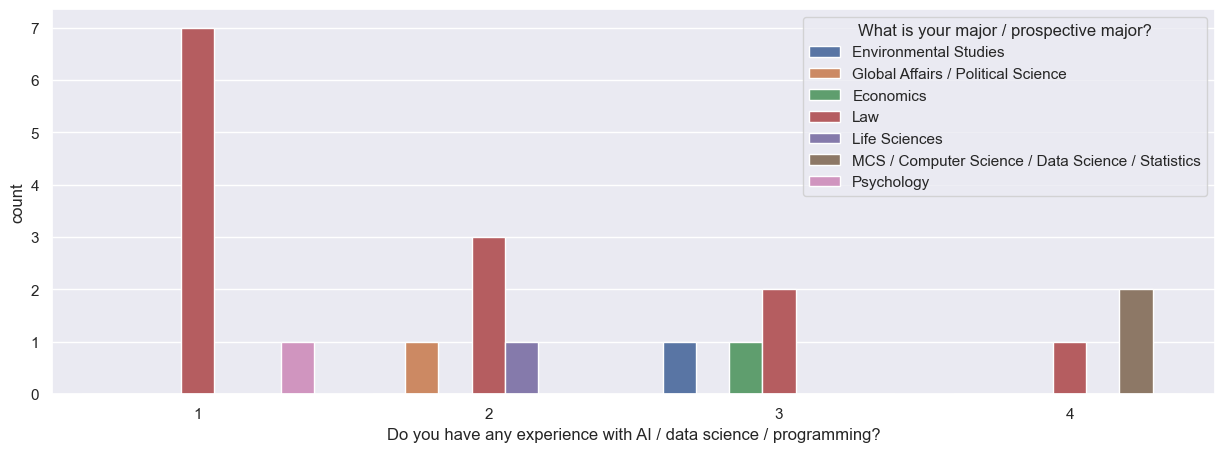

In [56]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = "Do you have any experience with AI / data science / programming?", data = df_results, hue = "What is your major / prospective major?")

<AxesSubplot:xlabel='Do you have any experience with regarding data privacy / law?', ylabel='count'>

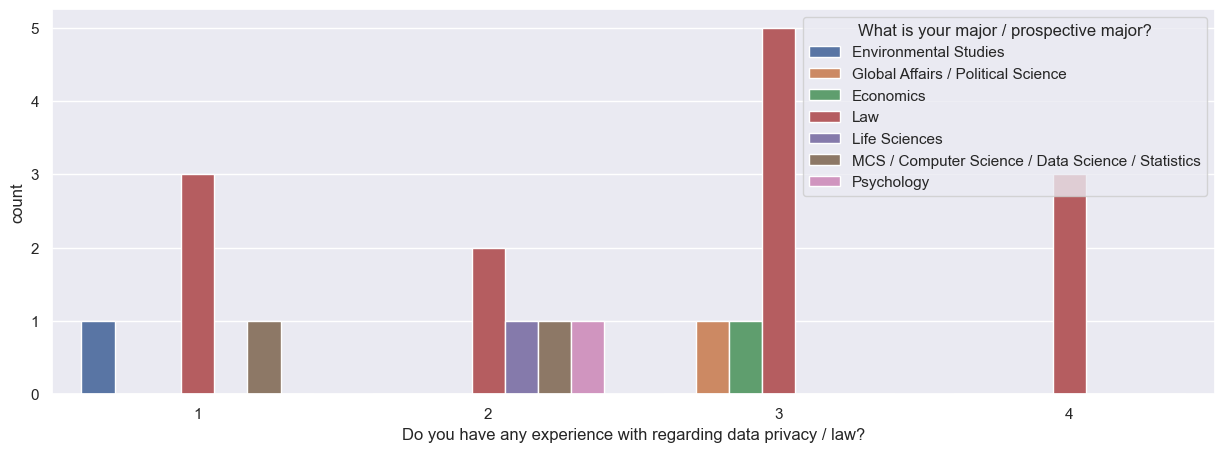

In [57]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'Do you have any experience with regarding data privacy / law?', data = df_results, hue = "What is your major / prospective major?")

<AxesSubplot:xlabel='Are you concerned about your data privacy?', ylabel='count'>

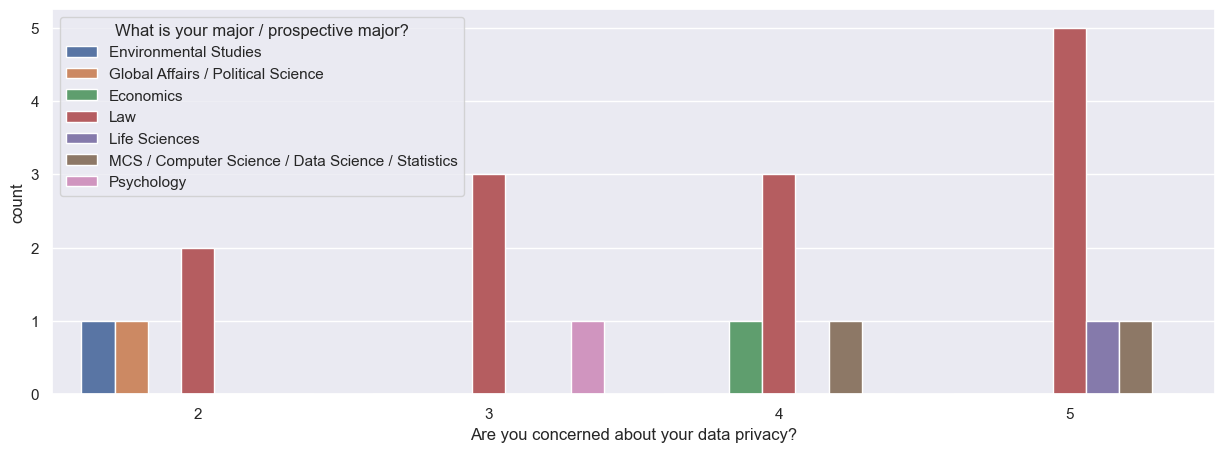

In [58]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'Are you concerned about your data privacy?', data = df_results, hue = "What is your major / prospective major?")

<AxesSubplot:xlabel='How would you rate your capability in protecting your online data?', ylabel='count'>

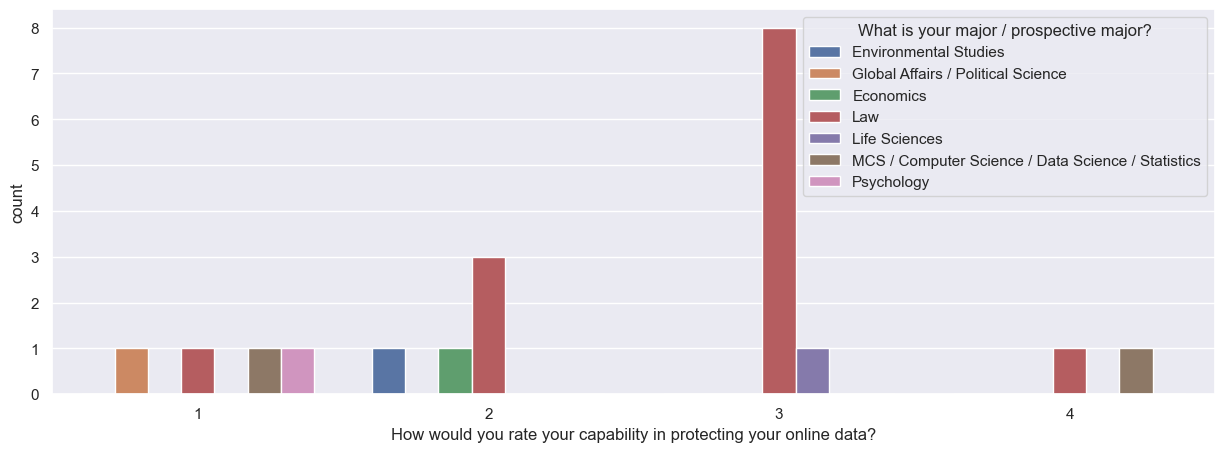

In [59]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'How would you rate your capability in protecting your online data?', data = df_results, hue = "What is your major / prospective major?")

<AxesSubplot:xlabel='Do you think decisions that are made by AI can be useful to society?', ylabel='count'>

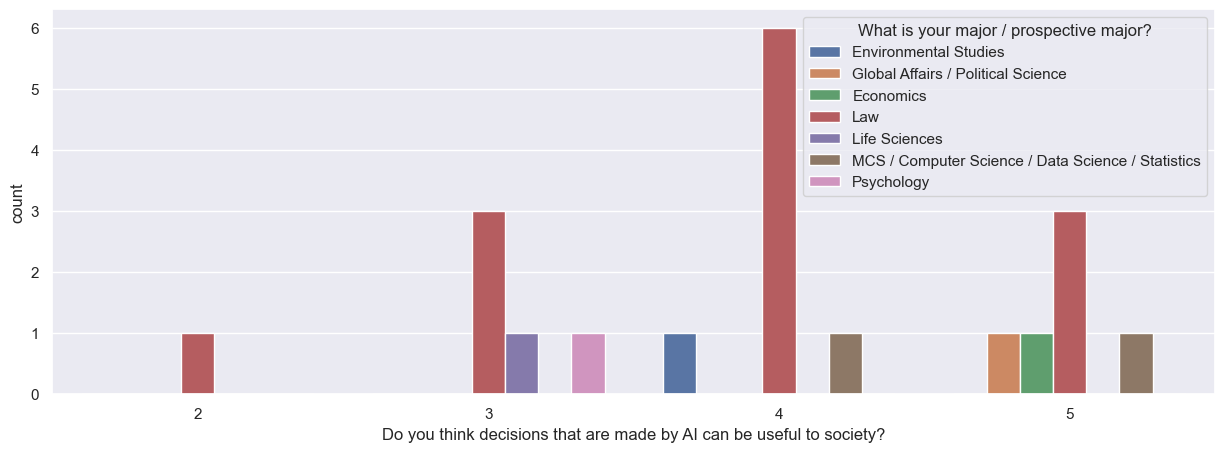

In [60]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'Do you think decisions that are made by AI can be useful to society?', data = df_results, hue = "What is your major / prospective major?")

<AxesSubplot:xlabel='Do you think decisions made by AI are fair?', ylabel='count'>

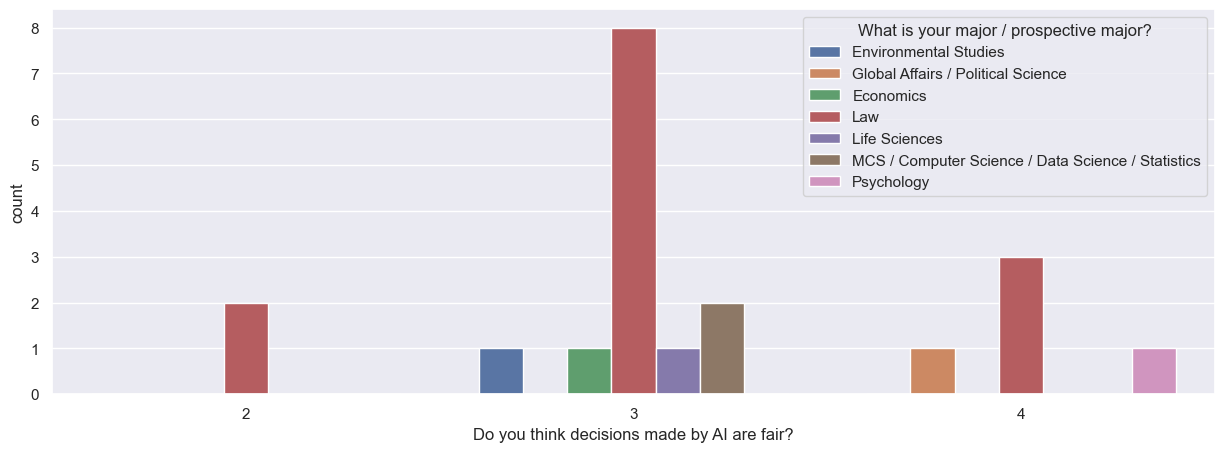

In [61]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'Do you think decisions made by AI are fair?', data = df_results, hue = "What is your major / prospective major?")

#### Comparing scores of the contexts before and after looking at the explanations

In [65]:
# Cols from initial questioning
print(df_results.columns[12:24])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?',
       'Think that using the model is a fair method of identifying violations of the PDPA?',
       'Think that using the model is a method that could be a risk to society?',
       'Trust the prediction made by the model?',
       'Think that using the model is an effective method of identifying violations of the PDPA?.1',
       'Think that using the model is a fair method of identifying violations of the PDPA?.1',
       'Think that using the model is a method that could be a risk to society?.1',
       'Trust the prediction made by the model?.1',
       'Think that using the model is an effective method of identifying violations of the PDPA?.2',
       'Think that using the model is a fair method of identifying violations of the PDPA?.2',
       'Think that using the model is a method that could be a risk to society?.2',
       'Trust the prediction made by the model?.2'],
      dtype

In [66]:
# Cols from last questioning
print(df_results.columns[45: -1])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?.3',
       'Think that using the model is a fair method of identifying violations of the PDPA?.3',
       'Think that using the model is a method that could be a risk to society?.3',
       'Trust the prediction made by the model?.3',
       'Think that using the model is an effective method of identifying violations of the PDPA?.4',
       'Think that using the model is a fair method of identifying violations of the PDPA?.4',
       'Think that using the model is a method that could be a risk to society?.4',
       'Trust the prediction made by the model?.4',
       'Think that using the model is an effective method of identifying violations of the PDPA?.5',
       'Think that using the model is a fair method of identifying violations of the PDPA?.5',
       'Think that using the model is a method that could be a risk to society?.5',
       'Trust the prediction made by the model?.5'],
   

### Comparing whether there is a significant difference amongst the respondents for the 3 contexts before and after they have viewed the explanations

Using significance testing: wilcoxon test

By using "less", it means that the distribution underlying d is stochastically less than a distribution symmetric about zero.

Where d = initial - final

So if d is negative, means that final scores are significantly higher than intial?

i.e. Respondents rated the model as more effective after looking at the visualisations

In [87]:
from scipy.stats import wilcoxon

#### First context, first question: Is model effective?

Less produces p < 0.05, hence underlying distribution of the difference of initial - final is less than symmetric about 0.

Hence, model is rated significantly more effective after respondents viewed the explanations

In [92]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.3"],
alternative= "less")

print(p)
print(stat)

0.016254722322859756
11.0


In [95]:
# Checking if greater
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.3"],
alternative= "greater")

print(p)
print(stat)

0.9837452776771403
11.0


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


#### First context, second question: Is model fair?

Both less and greater does not produce p < 0.05, hence no significant difference.

In [96]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.3"],
alternative= "less")

print(p)
print(stat)

0.6184876997235025
20.0


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [97]:
# Checking if greater
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.3"],
alternative= "greater")

print(p)
print(stat)

0.3815123002764975
20.0


#### First context, third question: Is model a risk to society?

Both less and greater does not produce p < 0.05, hence no significant difference.

In [98]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?"], 
df_results["Think that using the model is a method that could be a risk to society?.3"],
alternative= "less")

print(p)
print(stat)

0.6882772737245842
26.5


In [99]:
# Checking if greater
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?"], 
df_results["Think that using the model is a method that could be a risk to society?.3"],
alternative= "greater")

print(p)
print(stat)

0.31172272627541575
26.5


#### First context, fourth question: Do you trust prediction of the model?

Both less and greater does not produce p < 0.05, hence no significant difference.

In [100]:
# Checking if less
stat, p = wilcoxon(df_results["Trust the prediction made by the model?"], 
df_results["Trust the prediction made by the model?.3"],
alternative= "less")

print(p)
print(stat)

0.8407413278013518
67.5


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [101]:
# Checking if less
stat, p = wilcoxon(df_results["Trust the prediction made by the model?"], 
df_results["Trust the prediction made by the model?.3"],
alternative= "greater")

print(p)
print(stat)

0.1592586721986482
67.5


#### Second context, first question: Is model effective?

Greater produces p < 0.05, hence underlying distribution of the difference of initial - final is greater than symmetric about 0.

Hence, model is rated significantly less effective after respondents viewed the explanations

In [106]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.4"],
alternative= "less")

print(p)
print(stat)

0.9776951409875302
39.0


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [107]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.4"],
alternative= "greater")

print(p)
print(stat)

0.022304859012469803
39.0


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


#### Second context, second question: Is model fair?

In [108]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.4"],
alternative= "less")

print(p)
print(stat)

0.7973097217705288
35.0


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [109]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.4"],
alternative= "greater")

print(p)
print(stat)

0.20269027822947117
35.0


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


#### Second context, third question: Is model a risk to society?

In [110]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.1"], 
df_results["Think that using the model is a method that could be a risk to society?.4"],
alternative= "less")

print(p)
print(stat)

0.6985608986780787
17.0


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [111]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.1"], 
df_results["Think that using the model is a method that could be a risk to society?.4"],
alternative= "greater")

print(p)
print(stat)

0.30143910132192125
17.0


#### Second context, fourth question: Do you trust results of model?

In [112]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.1"], 
df_results["Trust the prediction made by the model?.4"],
alternative= "less")

print(p)
print(stat)

0.890863938957414
46.0


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [113]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.1"], 
df_results["Trust the prediction made by the model?.4"],
alternative= "greater")

print(p)
print(stat)

0.109136061042586
46.0


#### Third context, first question: Is model effective?

In [117]:
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.5"],
alternative= "less")

print(p)
print(stat)

0.890863938957414
46.0


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [118]:
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.5"],
alternative= "greater")

print(p)
print(stat)

0.109136061042586
46.0


#### Third context, second question: Is model fair?

In [119]:
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.5"],
alternative= "less")

print(p)
print(stat)

0.8140402831591116
36.0


In [120]:
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.5"],
alternative= "greater")

print(p)
print(stat)

0.18595971684088847
36.0


#### Third context, third question: Is model a risk to society?

In [121]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.2"], 
df_results["Think that using the model is a method that could be a risk to society?.5"],
alternative= "less")

print(p)
print(stat)

0.8140402831591116
36.0


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [122]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.2"], 
df_results["Think that using the model is a method that could be a risk to society?.5"],
alternative= "greater")

print(p)
print(stat)

0.18595971684088847
36.0


#### Third context, fourth question: Do you trust the model?

In [123]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.2"], 
df_results["Trust the prediction made by the model?.5"],
alternative= "less")

print(p)
print(stat)

0.6039655017265277
15.5


c:\Users\Tristan\Desktop\Capstone ML and Data privacy\capstone-repo\capstone\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [124]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.2"], 
df_results["Trust the prediction made by the model?.5"],
alternative= "greater")

print(p)
print(stat)

0.3960344982734723
15.5


#### Plotting the differences

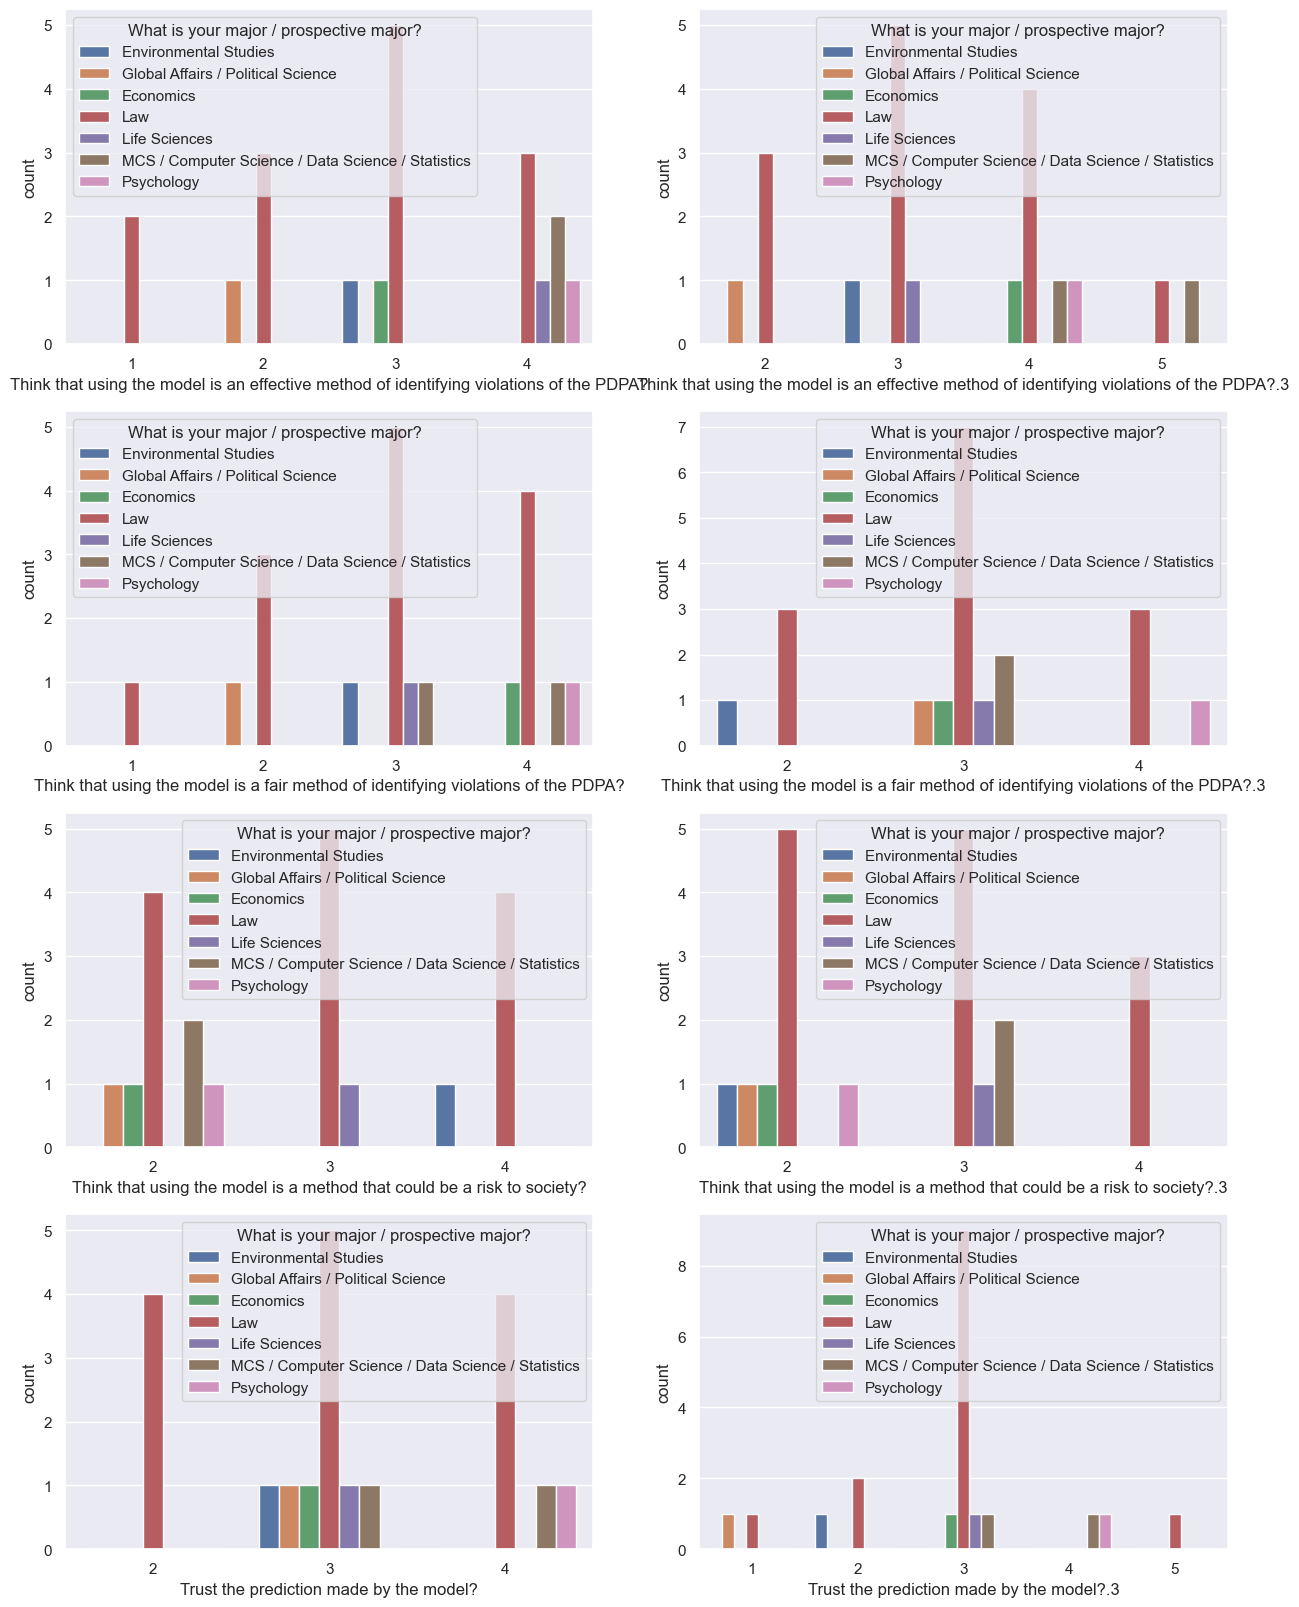

In [84]:
# Comparing for context 1
fig, ax = plt.subplots(4, 2)
sns.set(rc={'figure.figsize':(15,20)})

# First question
sns.countplot(x = 'Think that using the model is an effective method of identifying violatons of the PDPA?', data = df_results, hue = "What is your major / prospective major?", ax = ax[0, 0])
sns.countplot(x = 'Think that using the model is an effective method of identifying violatiions of the PDPA?.3', data = df_results, hue = "What is your major / prospective major?", ax = ax[0, 1])

# Second question
sns.countplot(x = 'Think that using the model is a fair method of identifying violations of the PDPA?', data = df_results, hue = "What is your major / prospective major?", ax = ax[1, 0])
sns.countplot(x = 'Think that using the model is a fair method of identifying violations of the PDPA?.3', data = df_results, hue = "What is your major / prospective major?", ax = ax[1, 1])

# third question
sns.countplot(x = 'Think that using the model is a method that could be a risk to society?', data = df_results, hue = "What is your major / prospective major?", ax = ax[2, 0])
sns.countplot(x = 'Think that using the model is a method that could be a risk to society?.3', data = df_results, hue = "What is your major / prospective major?", ax = ax[2, 1])

# Fourth question
sns.countplot(x = 'Trust the prediction made by the model?', data = df_results, hue = "What is your major / prospective major?", ax = ax[3, 0])
sns.countplot(x = 'Trust the prediction made by the model?.3', data = df_results, hue = "What is your major / prospective major?", ax = ax[3, 1])

plt.show()

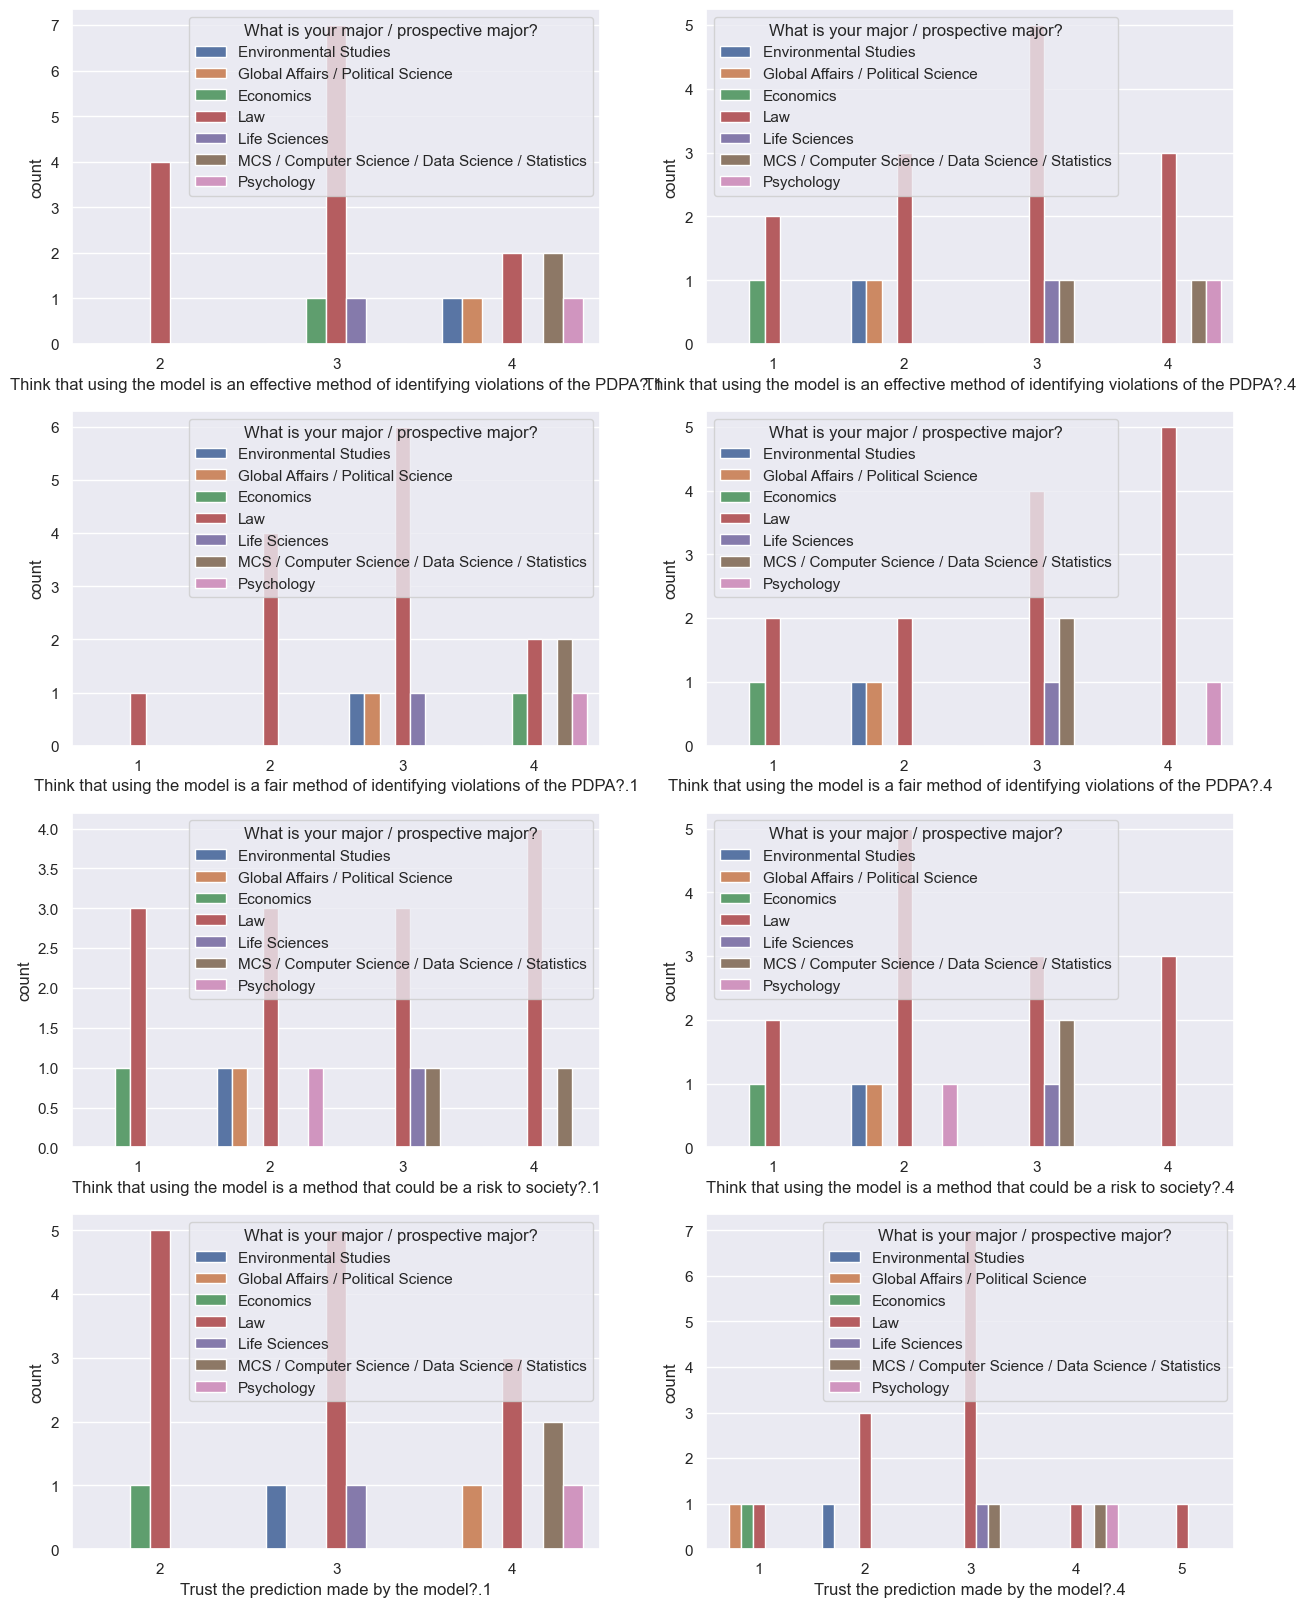

In [85]:
# Comparing for context 1
fig, ax = plt.subplots(4, 2)
sns.set(rc={'figure.figsize':(15,20)})

# First question
sns.countplot(x = 'Think that using the model is an effective method of identifying violations of the PDPA?.1', data = df_results, hue = "What is your major / prospective major?", ax = ax[0, 0])
sns.countplot(x = 'Think that using the model is an effective method of identifying violations of the PDPA?.4', data = df_results, hue = "What is your major / prospective major?", ax = ax[0, 1])

# Second question
sns.countplot(x = 'Think that using the model is a fair method of identifying violations of the PDPA?.1', data = df_results, hue = "What is your major / prospective major?", ax = ax[1, 0])
sns.countplot(x = 'Think that using the model is a fair method of identifying violations of the PDPA?.4', data = df_results, hue = "What is your major / prospective major?", ax = ax[1, 1])

# third question
sns.countplot(x = 'Think that using the model is a method that could be a risk to society?.1', data = df_results, hue = "What is your major / prospective major?", ax = ax[2, 0])
sns.countplot(x = 'Think that using the model is a method that could be a risk to society?.4', data = df_results, hue = "What is your major / prospective major?", ax = ax[2, 1])

# Fourth question
sns.countplot(x = 'Trust the prediction made by the model?.1', data = df_results, hue = "What is your major / prospective major?", ax = ax[3, 0])
sns.countplot(x = 'Trust the prediction made by the model?.4', data = df_results, hue = "What is your major / prospective major?", ax = ax[3, 1])

plt.show()

### Whether there is a significant preference between the two models in part 4 and part 5

#### For Log + glove vs svc + glove

Overall votes:

1st model: 2 + 1 + 4 = 7

2nd model: 1 + 7 + 1 = 9

No difference: 17 + 12 + 15 = 44

In [125]:
# Part 4: Comparing between log + glove vs svc + glove
print(df_results.columns[39:42])

Index(['Which explanation did you find easier to interpret?',
       'Which explanation did you find easier to interpret?.1',
       'Which explanation did you find easier to interpret?.2'],
      dtype='object')


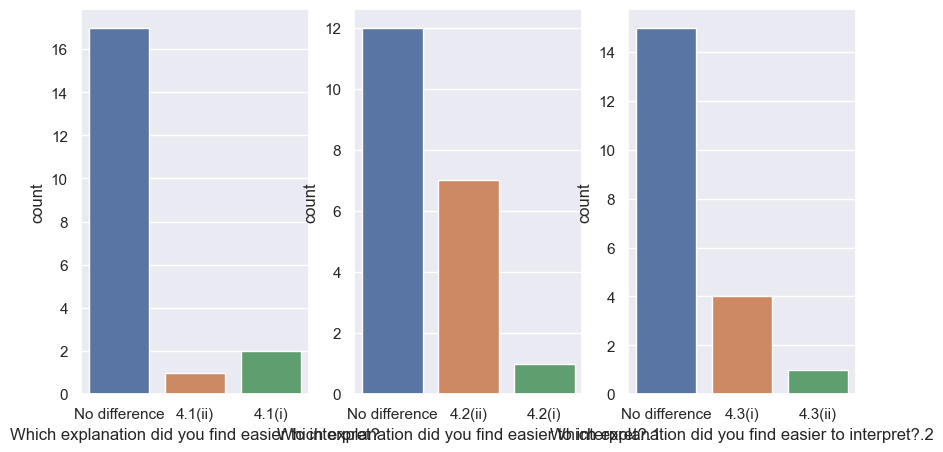

In [130]:
# Per question
fig, ax = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(10,5)})

sns.countplot(x = 'Which explanation did you find easier to interpret?', data = df_results, ax = ax[0])
sns.countplot(x = 'Which explanation did you find easier to interpret?.1', data = df_results, ax = ax[1])
sns.countplot(x = 'Which explanation did you find easier to interpret?.2', data = df_results, ax = ax[2])
plt.show()

In [136]:
df_results[df_results.columns[39:42]].apply(pd.Series.value_counts)

,Which explanation did you find easier to interpret?,Which explanation did you find easier to interpret?.1,Which explanation did you find easier to interpret?.2
4.1(i),2.0,NaN,NaN
4.1(ii),1.0,NaN,NaN
4.2(i),NaN,1.0,NaN
4.2(ii),NaN,7.0,NaN
4.3(i),NaN,NaN,4.0
4.3(ii),NaN,NaN,1.0
No difference,17.0,12.0,15.0


### Part 5: Comparing between svc + tfidf vs svc + glove

#### Total no. of votes across the questions

1st model: 9 + 5 + 4 = 18

2nd model: 5 + 10 + 10 = 25

No difference: 6 + 5 + 4 = 16

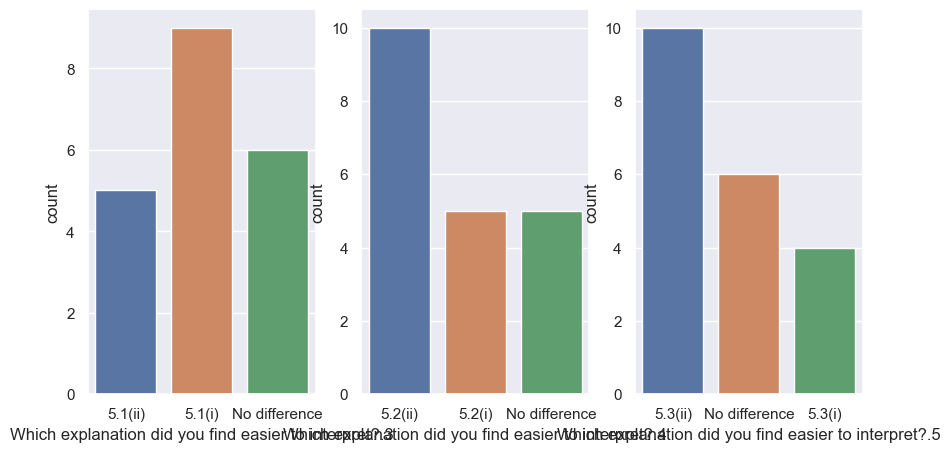

In [131]:
fig, ax = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(10,5)})

sns.countplot(x = 'Which explanation did you find easier to interpret?.3', data = df_results, ax = ax[0])
sns.countplot(x = 'Which explanation did you find easier to interpret?.4', data = df_results, ax = ax[1])
sns.countplot(x = 'Which explanation did you find easier to interpret?.5', data = df_results, ax = ax[2])
plt.show()

In [141]:
df_results[df_results.columns[42:45]].apply(pd.Series.value_counts)

,Which explanation did you find easier to interpret?.3,Which explanation did you find easier to interpret?.4,Which explanation did you find easier to interpret?.5
5.1(i),9.0,NaN,NaN
5.1(ii),5.0,NaN,NaN
5.2(i),NaN,5.0,NaN
5.2(ii),NaN,10.0,NaN
5.3(i),NaN,NaN,4.0
5.3(ii),NaN,NaN,10.0
No difference,6.0,5.0,6.0


### Part 3: Looking at whether the metrics of understanding increased over the questions 

In [142]:
# Part 3: Assessing understandability of log + tfidf
print(df_results.columns[24:39])

Index(['Do you understand why the model made the prediction?',
       'Why do you think the model made this prediction? ',
       'Did you find the visualisation easy to interpret?',
       'Do you understand why the model made the prediction?.1',
       'Why do you think the model made this prediction? .1',
       'Did you find the visualisation easy to interpret?.1',
       'Based on your current understanding, do you think that the sentence below would be predicted to be "Identifier_Cookie_or_Similar_Tech_1stParty"?\n\n"We also use tracking technologies to keep records, store your preferences, improve our advertising, and collect Non-Identifying Information, including Device Data and information about your interaction with the Site and our Business Partners' web sites."',
       'Do you understand why the model made the prediction?.2',
       'Why do you think the model made this prediction?',
       'Did you find the visualisation easy to interpret?.2',
       'Based on your curren

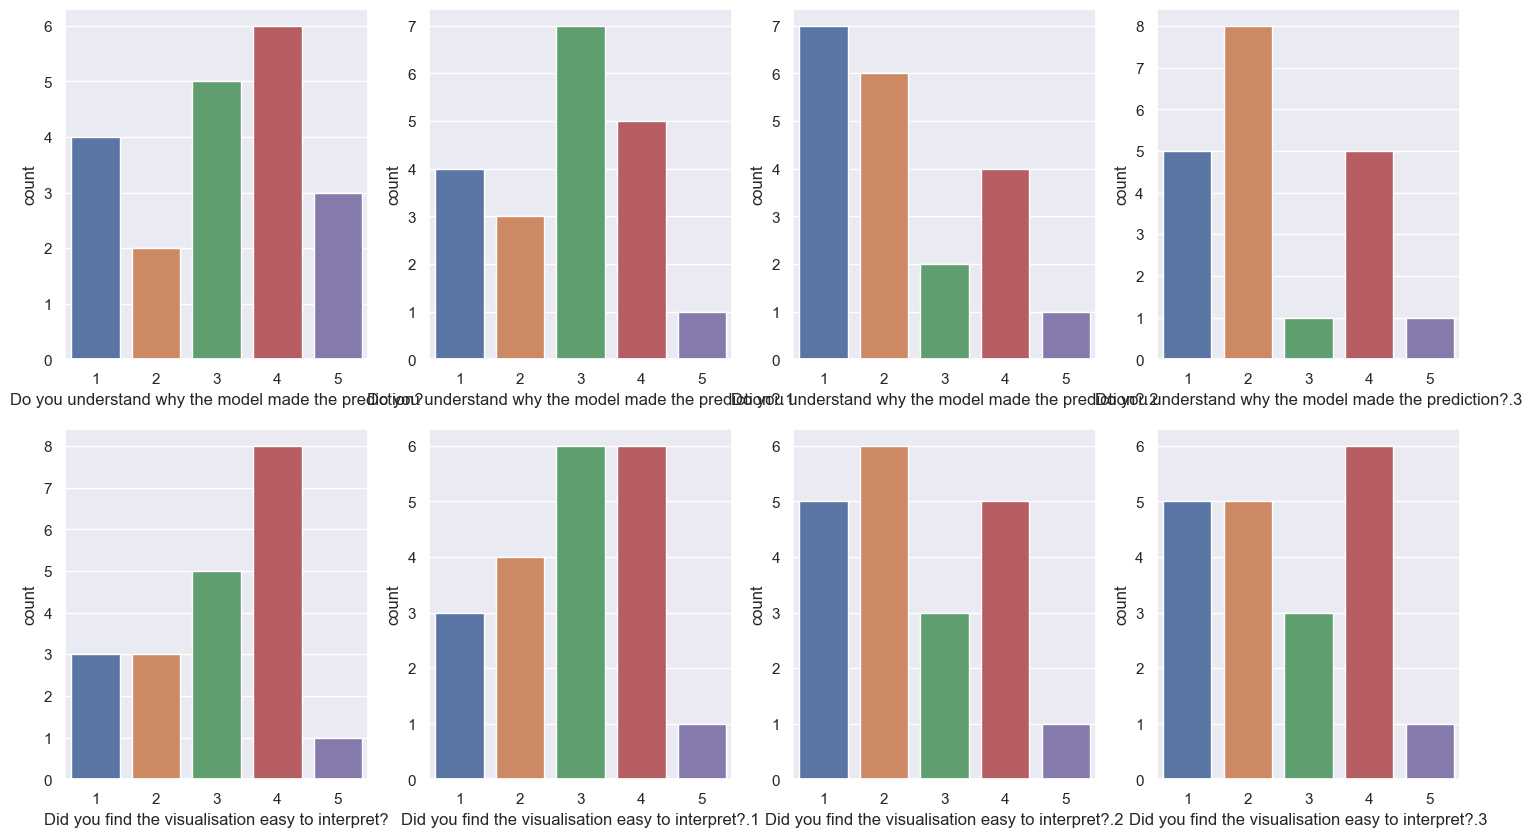

In [152]:
fig, ax = plt.subplots(2, 4)
sns.set(rc={'figure.figsize':(18,10)})

sns.countplot(x = "Do you understand why the model made the prediction?", data = df_results, ax = ax[0, 0])
sns.countplot(x = "Do you understand why the model made the prediction?.1", data = df_results, ax = ax[0, 1])
sns.countplot(x = "Do you understand why the model made the prediction?.2", data = df_results, ax = ax[0, 2])
sns.countplot(x = "Do you understand why the model made the prediction?.3", data = df_results, ax = ax[0, 3])

sns.countplot(x = "Did you find the visualisation easy to interpret?", data = df_results, ax = ax[1, 0])
sns.countplot(x = "Did you find the visualisation easy to interpret?.1", data = df_results, ax = ax[1, 1])
sns.countplot(x = "Did you find the visualisation easy to interpret?.2", data = df_results, ax = ax[1, 2])
sns.countplot(x = "Did you find the visualisation easy to interpret?.3", data = df_results, ax = ax[1, 3])
plt.show()

In [156]:
# Take the average of each question and compare since distributions aren't very meaningful
part3_understand = []
part3_interpret = []

part3_understand.append(df_results["Do you understand why the model made the prediction?"].mean())
part3_understand.append(df_results["Do you understand why the model made the prediction?.1"].mean())
part3_understand.append(df_results["Do you understand why the model made the prediction?.2"].mean())
part3_understand.append(df_results["Do you understand why the model made the prediction?.3"].mean())

part3_interpret.append(df_results["Did you find the visualisation easy to interpret?"].mean())
part3_interpret.append(df_results["Did you find the visualisation easy to interpret?.1"].mean())
part3_interpret.append(df_results["Did you find the visualisation easy to interpret?.2"].mean())
part3_interpret.append(df_results["Did you find the visualisation easy to interpret?.3"].mean())

In [165]:
df_part3 = pd.DataFrame(
    data = {
        "question_no" : [n for n in range(1, 5)],
        "understand" : part3_understand,
        "interpret" : part3_interpret
    }
)

df_part3.head()

,question_no,understand,interpret
0,1,3.10,3.05
1,2,2.80,2.90
2,3,2.30,2.55
3,4,2.45,2.65


In [168]:
df_part3 = pd.melt(df_part3, id_vars = ["question_no"], value_vars = ["understand", "interpret"], value_name="score", var_name = "metric")

df_part3.head()

,question_no,metric,score
0,1,understand,3.10
1,2,understand,2.80
2,3,understand,2.30
3,4,understand,2.45
4,1,interpret,3.05


<AxesSubplot:xlabel='question_no', ylabel='score'>

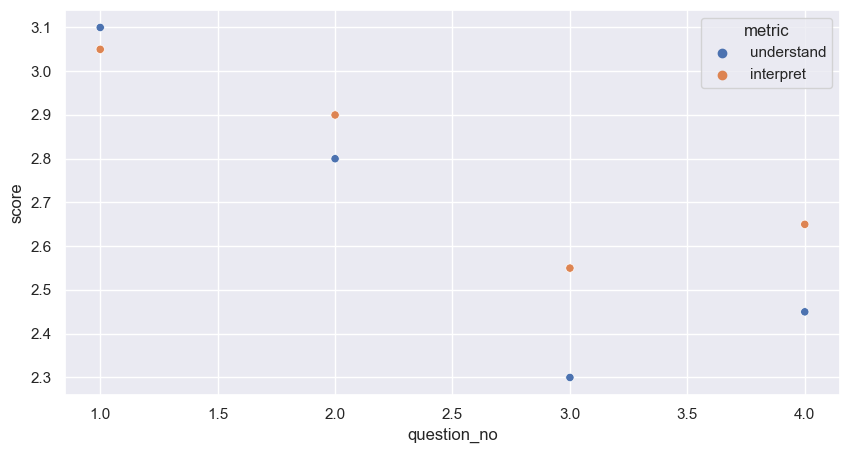

In [170]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x = "question_no", y = "score", data = df_part3, hue = "metric")